In [1]:
"""
Laboratorio 2: Generación de reportes automáticos

Objetivo: Crear un reporte automático con análisis y visualizaciones.

"""

import pandas as pd
import matplotlib.pyplot as plt
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter

"""
Instrucciones:
1. Usa el archivo del ejercicio anterior.
"""

ruta = r'/workspaces/CursoPython-Basico-JuanDavid/Sesión_13/datos/datos_produccion_automatizada_grande_limpio.csv'
df = pd.read_csv(ruta, parse_dates=['fecha'])
print(f'Datos cargados: {df.shape[0]} filas, {df.shape[1]} columnas')


Datos cargados: 8384 filas, 9 columnas


Resumen estadístico:
                               fecha  produccion_bpd  presion_psi  \
count                           8384     8384.000000  8384.000000   
mean   2027-05-15 02:01:20.724236544     1192.870420  1756.499094   
min              1990-01-01 00:00:00    -1478.800000 -1857.700000   
25%              2025-09-11 10:30:00     1042.475000  1656.300000   
50%              2027-05-24 15:00:00     1181.600000  1749.000000   
75%              2029-02-14 13:30:00     1301.300000  1842.500000   
max              2030-11-04 18:00:00     4625.400000  4343.300000   
std                              NaN      413.749011   364.088241   

       temperatura_f  agua_porcentaje  gas_porcentaje  
count    8384.000000      8384.000000     8384.000000  
mean      145.010675        14.986009       17.999416  
min      -242.600000         0.000000        2.600000  
25%       136.900000        11.600000       15.300000  
50%       145.100000        15.050000       18.000000  
75%       153.000000 

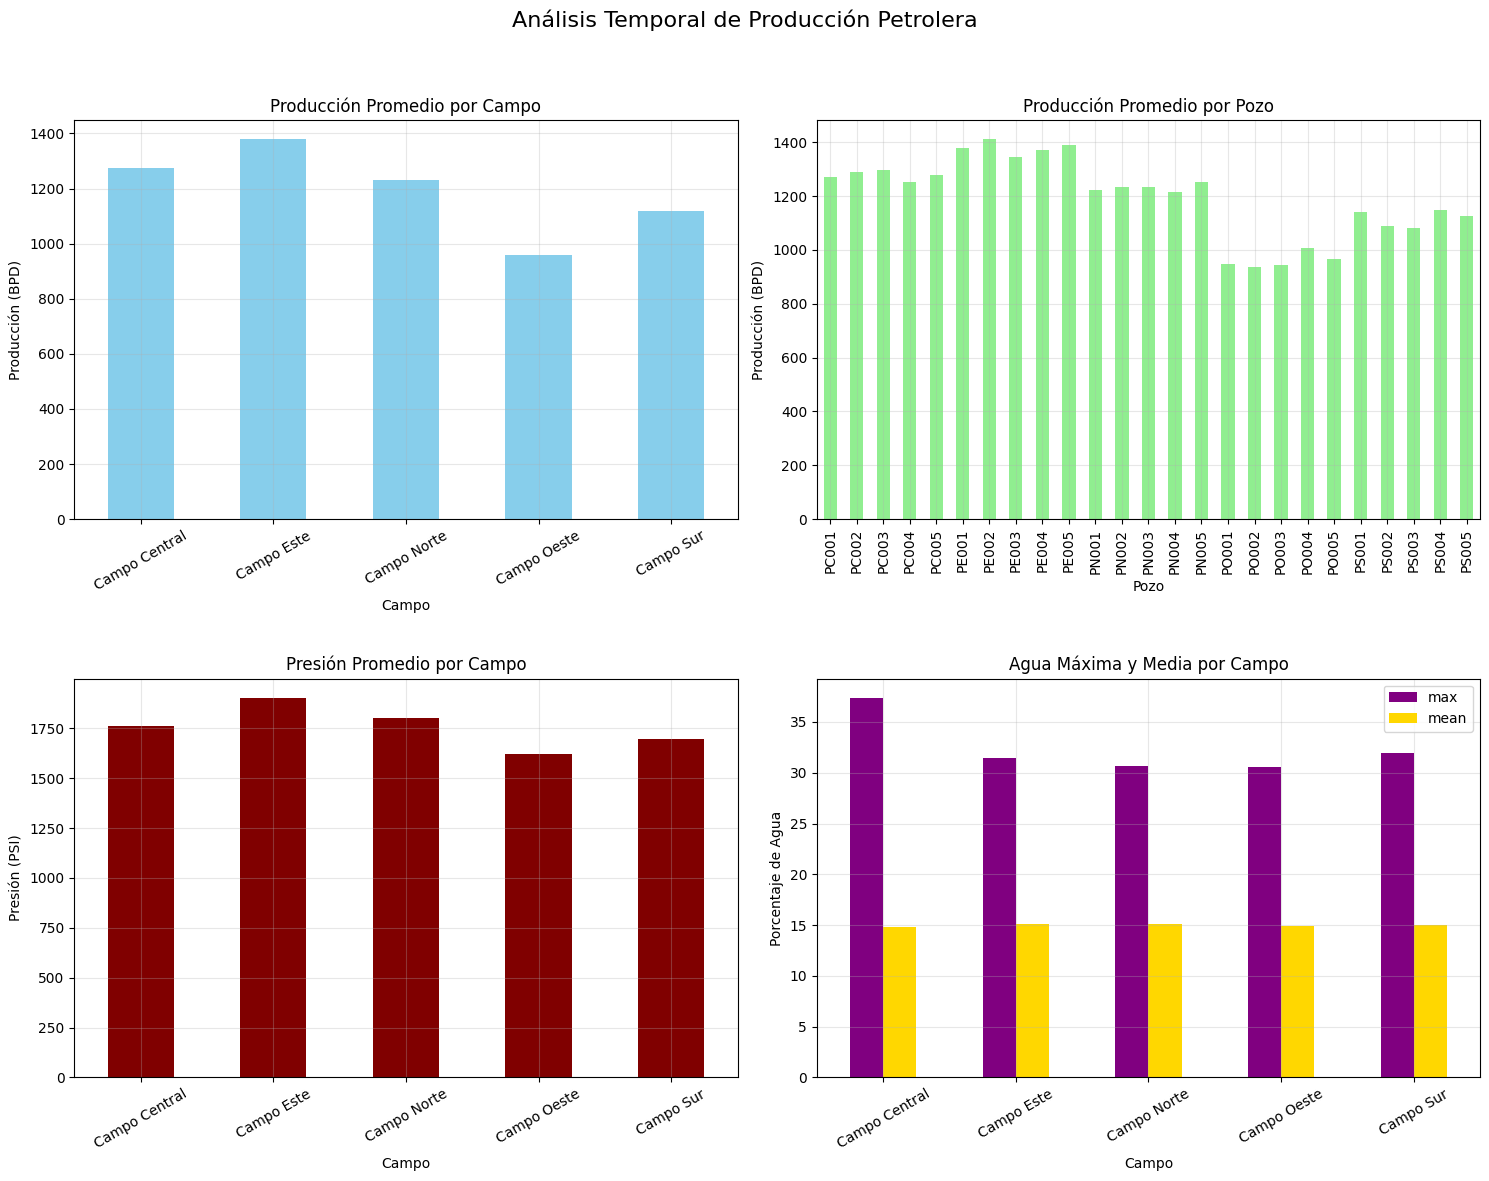

In [2]:
"""
Instrucciones:
2. Genera un resumen estadístico y al menos un gráfico de producción.
"""
resumen_estadistico = df.describe()
print("Resumen estadístico:")
print(resumen_estadistico)

# Crear resumen
resumen = {
    'Total producción (bpd)': df['produccion_bpd'].sum(),
    'Promedio presión (psi)': df['presion_psi'].mean(),
    'Promedio temperatura (F)': df['temperatura_f'].mean(),
    'Máximo producción (bpd)': df['produccion_bpd'].max(),
    'Mínimo producción (bpd)': df['produccion_bpd'].min(),
    'Máximo presión (psi)': df['presion_psi'].max(),
    'Mínimo presión (psi)': df['presion_psi'].min(),
    'Máximo temperatura (F)': df['temperatura_f'].max(),
    'Mínimo temperatura (F)': df['temperatura_f'].min(),
    'Máximo agua (%)': df['agua_porcentaje'].max(),
    'Media agua (%)': df['agua_porcentaje'].mean(),
    'Máximo gas (%)': df['gas_porcentaje'].max(),
    'Media gas (%)': df['gas_porcentaje'].mean()
}
resumen_df = pd.DataFrame([resumen])

#Datos negativos
datos_negativos = df[df['produccion_bpd'] < 0]
if not datos_negativos.empty:
    print()
    print("Datos negativos encontrados:")
    print(datos_negativos)

# Producción, presión y temperatura por campo
resumen_por_campo = df.groupby('campo')[['produccion_bpd', 'presion_psi', 'temperatura_f']].agg(['mean', 'min', 'max', 'std'])

# Producción total por pozo
produccion_por_pozo = df.groupby('pozo_id')['produccion_bpd'].sum().sort_values(ascending=False)

print("\n📊 Resumen general:")
print(resumen)

#. Gráfico de producción por pozo

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis Temporal de Producción Petrolera', fontsize=16)

#Gráfica 1: Producción por campo

df.groupby('campo')['produccion_bpd'].mean().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Producción Promedio por Campo')
axes[0, 0].set_ylabel('Producción (BPD)')   
axes[0, 0].set_xlabel('Campo')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=30)

#Gráfica 2: Producción por pozo

df.groupby('pozo_id')['produccion_bpd'].mean().plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Producción Promedio por Pozo')
axes[0, 1].set_ylabel('Producción (BPD)')
axes[0, 1].set_xlabel('Pozo')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=90)

#Gráfica 3: Presion promedio por campo

df.groupby('campo')['presion_psi'].mean().plot(kind='bar', ax=axes[1, 0], color='maroon')
axes[1, 0].set_title('Presión Promedio por Campo')
axes[1, 0].set_ylabel('Presión (PSI)')
axes[1, 0].set_xlabel('Campo')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=30)

# Gráfica 4: Agua maxima y media por campo

df.groupby('campo')['agua_porcentaje'].agg(['max', 'mean']).plot(kind='bar', ax=axes[1, 1], color=['purple', 'gold'])
axes[1, 1].set_title('Agua Máxima y Media por Campo')
axes[1, 1].set_ylabel('Porcentaje de Agua')
axes[1, 1].set_xlabel('Campo')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=30)

# Ajustes finales
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.4)  # Espacio vertical entre filas
grafico_path = '/workspaces/CursoPython-Basico-JuanDavid/Sesión_13/grafico_produccion_grande.png'
plt.savefig(grafico_path)
plt.show()



In [3]:
"""
Instrucciones:
3. Exporta el reporte en los tres siguientes formatos: Excel, PDF y HTML.
4. El reporte debe incluir el resumen y el gráfico.
"""

# Exportar a Excel
excel_path = 'reporte_produccion_grande.xlsx'
with pd.ExcelWriter(excel_path) as writer:
    resumen_df.to_excel(writer, sheet_name='Resumen', index=False)
    resumen_por_campo.to_excel(writer, sheet_name='Resumen por Campo')
    produccion_por_pozo.to_excel(writer, sheet_name='Producción por Pozo')
    df.to_excel(writer, sheet_name='Datos', index=False)
print('Reporte Excel generado.')

# Exportar a PDF
pdf_path = 'reporte_produccion_grande.pdf'
c = canvas.Canvas(pdf_path, pagesize=letter)
linea = 710
espacio = 15
c.drawString(100, 750, 'Reporte de Producción Automática')
c.drawString(100, 730, 'Resumen Estadístico:')

for etiqueta, valor in resumen_df.iloc[0].items():
    c.drawString(100, linea, f"- {etiqueta}: {valor:,.2f}")
    linea -= espacio
    if linea < 100:  # Agrega una segunda página si se acaba el espacio
        c.showPage()
        c.setFont("Helvetica", 11)
        linea = 750

c.drawImage(grafico_path, 100, 400, width=400, height=200)
c.save()
print('Reporte PDF generado.')

# Exportar a HTML
html_path = 'reporte_produccion_grande.html'
with open(html_path, 'w') as f:
    f.write('<html><head><title>Reporte de Producción</title></head><body>')
    f.write('<h1>Reporte de Producción Automática</h1>')
    f.write('<h2>Resumen Estadístico</h2>')
    f.write(resumen_df.to_html(index=False))
    f.write('<h2>Resumen por Campo</h2>')
    f.write(resumen_por_campo.to_html())
    f.write('<h2>Producción por Pozo</h2>')
    f.write(produccion_por_pozo.to_frame().to_html())
    f.write('<h2>Gráfico de Producción</h2>')
    f.write(f'<img src="{grafico_path}" alt="Gráfico de Producción">')
    f.write('</body></html>')
print('Reporte HTML generado.')


Reporte Excel generado.
Reporte PDF generado.
Reporte HTML generado.
